In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Flatten
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
# Load the dataset
data = pd.read_csv('E:\\SIMIN_NN\\Shervin\\df_cleaned.csv')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 704 non-null    int64  
 1   gendera             704 non-null    int64  
 2   BMI                 704 non-null    float64
 3   hypertensive        704 non-null    int64  
 4   glucose             704 non-null    float64
 5   RBC                 704 non-null    float64
 6   PH                  704 non-null    float64
 7   EF                  704 non-null    int64  
 8   COPD                704 non-null    int64  
 9   PT                  704 non-null    float64
 10  Platelets           704 non-null    float64
 11  atrialfibrillation  704 non-null    int64  
 12  CHD with no MI      704 non-null    int64  
 13  Hyperlipemia        704 non-null    int64  
 14  deficiencyanemias   704 non-null    int64  
 15  depression          704 non-null    int64  
dtypes: float

In [62]:
#data.info()
data

,age,gendera,BMI,hypertensive,glucose,RBC,PH,EF,COPD,PT,Platelets,atrialfibrillation,CHD with no MI,Hyperlipemia,deficiencyanemias,depression
0,72,1,37.588179,0,114.636364,2.960000,7.230000,55,0,10.600000,305.100000,0,0,1,1,0
1,83,0,26.572634,0,149.000000,2.620000,7.268000,35,0,11.275000,204.200000,0,0,0,1,0
2,43,0,83.264629,0,128.250000,4.277500,7.370000,55,0,27.066667,216.375000,0,0,0,0,0
3,76,1,24.262293,1,98.333333,3.235000,7.310000,35,1,18.783333,273.000000,1,0,1,1,0
4,72,1,39.667426,1,105.600000,3.720000,7.169231,55,1,14.000000,140.250000,0,0,1,0,0
5,83,0,22.311111,1,147.800000,2.867143,7.550000,75,0,16.671429,222.714286,1,0,0,1,0
6,61,0,19.992243,1,98.428571,3.417500,7.360000,50,0,19.275000,129.882353,1,0,0,0,0
7,67,1,45.032030,1,74.166667,3.270000,7.360000,55,0,14.700000,235.333333,0,0,0,0,0
8,70,0,50.461212,1,119.571429,3.182222,7.248889,75,0,12.950000,185.333333,0,0,1,0,0
9,83,0,25.391896,1,111.666667,3.532500,7.430000,55,0,13.275000,309.250000,0,0,1,1,0


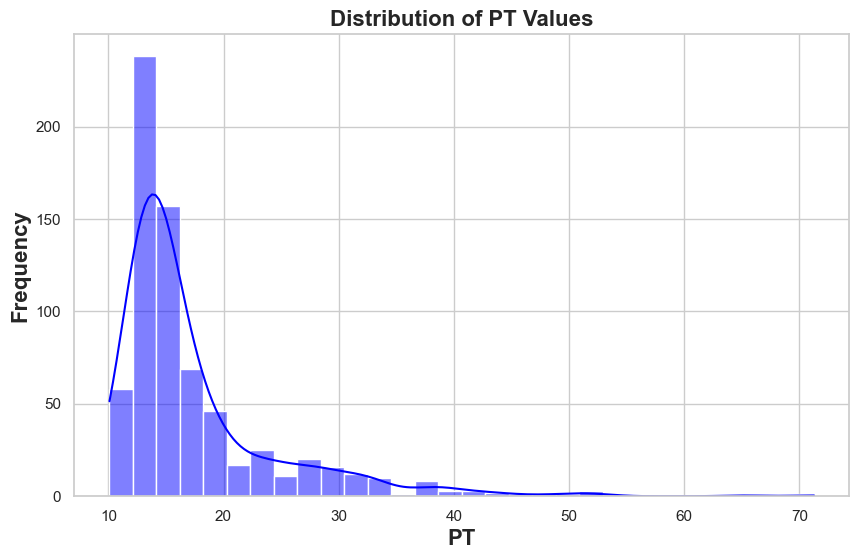

In [63]:
#"PT" distribution

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['PT'], bins=30, kde=True, color='blue')
plt.title('Distribution of PT Values', fontsize=16, fontweight='bold')
plt.xlabel('PT',fontsize=16, fontweight='bold')
plt.ylabel('Frequency',fontsize=16, fontweight='bold')
plt.show()

In [64]:
#Normalization
# PRIPARE DATA
MX_AGE = 120
MX_BMI = 105
MX_RBC = 7
MX_GLU = 450
MX_EF = 80
MX_PL = 1030 #1030
MX_PT = 75

data['age'] = data['age'] / MX_AGE 
data['BMI'] = data['BMI'] / MX_BMI
data['RBC'] = data['RBC'] / MX_RBC
data['glucose'] = data['glucose'] / MX_GLU
data['EF'] = data['EF'] / MX_EF
data['PH'] = data['PH'] - 7.0
# data['gendera'] = (data['gendera'] / 3 ) + 0.1
# data['hypertensive'] = (data['hypertensive'] / 3 ) + 0.1
# data['COPD'] = (data['COPD'] / 3 ) + 0.1
# data['CHD with no MI'] = (data['CHD with no MI'] / 3 ) + 0.1
# data['Hyperlipemia'] = (data['Hyperlipemia'] / 3 ) + 0.1
# data['deficiencyanemias'] = (data['deficiencyanemias'] / 3 ) + 0.1
# data['depression'] = (data['depression'] / 3 ) + 0.1



data['Platelets'] = data['Platelets'] / MX_PL
data['PT'] = data['PT'] / MX_PT
# Check the first few rows to confirm changes
data.head()



,age,gendera,BMI,hypertensive,glucose,RBC,PH,EF,COPD,PT,Platelets,atrialfibrillation,CHD with no MI,Hyperlipemia,deficiencyanemias,depression
0,0.600000,1,0.357983,0,0.254747,0.422857,0.230000,0.6875,0,0.141333,0.296214,0,0,1,1,0
1,0.691667,0,0.253073,0,0.331111,0.374286,0.268000,0.4375,0,0.150333,0.198252,0,0,0,1,0
2,0.358333,0,0.792996,0,0.285000,0.611071,0.370000,0.6875,0,0.360889,0.210073,0,0,0,0,0
3,0.633333,1,0.231069,1,0.218519,0.462143,0.310000,0.4375,1,0.250444,0.265049,1,0,1,1,0
4,0.600000,1,0.377785,1,0.234667,0.531429,0.169231,0.6875,1,0.186667,0.136165,0,0,1,0,0


In [65]:
# Load the dataframe
df_input = data

# Print the number of rows
row_count = len(df_input)
print(f"Total number of rows: {row_count}")

# Ask for the number of data needed for training
NN = int(input("How many data do you need for TEST(press Enter)? "))

# Check if NN is not greater than the total number of rows
if NN > row_count:
    print("Error: NN is greater than the total number of rows.")
else:
    # Splitting the dataframe
    train_df = df_input.iloc[:-NN] # or df_input.head(row_count - NN)
    test_df = df_input.iloc[-NN:] # or df_input.tail(NN)

    # Optionally, display the first few rows of each dataframe to verify
    print(row_count-NN,"\nTrain DataFrame:  Done!")
    #print(train_df.head())
    print(NN,"\nTest DataFrame:  Done!")
    #print(test_df.head())

Total number of rows: 704
How many data do you need for TEST(press Enter)? 100
604 
Train DataFrame:  Done!
100 
Test DataFrame:  Done!


In [8]:
# test_df

In [42]:
# Assuming train_df and test_df have the same columns, we take the column names from train_df
columns = train_df.columns.tolist()

# Create checkboxes for input selection
input_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]
output_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]

input_box = widgets.VBox(input_checkboxes)
output_box = widgets.VBox(output_checkboxes)

# Function to handle button click event for input selection
def on_input_button_clicked(b):
    selected_input_columns = [cb.description for cb in input_checkboxes if cb.value]
    global input_df  # Use global to use this outside the function if required
    input_df = train_df[selected_input_columns].copy()
    print("Selected input columns:", selected_input_columns)

# Function to handle button click event for output selection
def on_output_button_clicked(b):
    selected_output_columns = [cb.description for cb in output_checkboxes if cb.value]
    global output_df  # Use global to use this outside the function if required
    output_df = train_df[selected_output_columns].copy()
    print("Selected output columns:", selected_output_columns)

input_button = widgets.Button(description="Select Input")
output_button = widgets.Button(description="Select Output")

input_button.on_click(on_input_button_clicked)
output_button.on_click(on_output_button_clicked)

display(widgets.Label('SELECT INPUT'), input_box, input_button)
display(widgets.Label('SELECT OUTPUT'), output_box, output_button)

Label(value='SELECT INPUT')

Button(description='Select Input', style=ButtonStyle())

Label(value='SELECT OUTPUT')

Button(description='Select Output', style=ButtonStyle())

Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['PT']
Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['PT']


In [66]:
# Number of input Nodes and Output Nodes
Input_Nodes = len(input_df.columns)
Output_Nodes = len(output_df.columns)

In [67]:

df_output = output_df
df_input = input_df

In [11]:
# df_output

In [12]:
# print('****INPUT***************************************************')
# print(df_input.head())
# print('****OUTPUT***************************************************')
# print(df_output.head())
# print('********************************************************')

In [11]:
# faghat baraye peida kardane model jadid run shavad

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size = 0.3, random_state = 40 )

In [69]:
# Layers
model = Sequential()
model.add(Dense(2*Input_Nodes,activation='relu', input_shape=(Input_Nodes,)))#first Hidden  sigmoid relu
model.add(Dense(3*Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='softmax'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(round(Input_Nodes/2),activation='relu'))
model.add(Dense(Output_Nodes, use_bias=False)) # output
#model.add(Dropout(0.2))
# model.add(Dense(13,activation='tanh'))
#model.add(Dropout(0.2))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
#model.add(Dense(7,activation='tanh'))
#model.add(Dense(13,activation='relu'))
#model.add(Dense(5,activation='relu'))
#model.add(Dense(Output_Nodes, use_bias=False))

C:\Users\simin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
#model.compile(optimizer = 'rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')

# early_stop = EarlyStopping(monitor='val_loss', patience=10)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [71]:
epochs = 200
model.fit(x = x_train, y = y_train, epochs = epochs)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0684
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 
Epoch 82/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 
Epoch 83/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 
Epoch 84/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 
Epoch 85/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Epoch 86/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 
Epoch 87/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 
Epoch 88/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 89/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 
Epoch 90/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 
Epoch 91/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 
Epoch 92/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 93/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 
Epoch 94/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 95/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 
Epoch 161/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 
Epoch 162/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 
Epoch 163/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 
Epoch 164/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 165/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 
Epoch 166/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 167/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Epoch 168/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 
Epoch 169/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 170/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Epoch 171/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 
Epoch 172/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 
Epoch 173/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 
Epoch 174/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [72]:
Loss_df = pd.DataFrame(model.history.history)

LOSS ERROR PLOT :


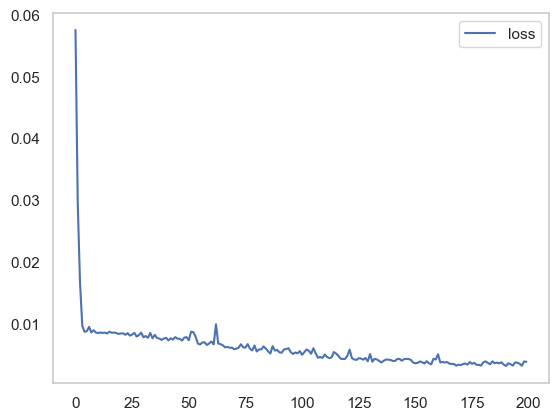

In [73]:
print('LOSS ERROR PLOT :')

# Plot without grid lines
ax = Loss_df.plot()
ax.grid(False)  # Disable grid lines
plt.show()


In [74]:

print("MSE OF TEST TRAIN IS :   ")
model.evaluate(x_train, y_train, verbose = 0)


MSE OF TEST TRAIN IS :   


0.004432405810803175

In [75]:
print("MSE OF TEST DATA IS :   ")
model.evaluate(x_test, y_test, verbose = 0)

MSE OF TEST DATA IS :   


0.009170717559754848

In [76]:

# Assuming 'model.predict()' to get predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate the absolute errors
mae_train = np.mean(np.abs(y_train_pred - y_train))
mae_test = np.mean(np.abs(y_test_pred - y_test))

# Print out the Mean Absolute Error for both train and test datasets
print("MAE for Training Data: ", mae_train)
print("MAE for Testing Data: ", mae_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE for Training Data:  0.04216651291233973
MAE for Testing Data:  0.060403504986528016


In [77]:

# Assume y_train and y_test are your actual target values for training and testing datasets.
# y_train_pred and y_test_pred are predictions from your model.

# Calculate the mean of the actual values
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)

# Calculate MAE as previously described
mae_train = np.mean(np.abs(y_train_pred - y_train))
mae_test = np.mean(np.abs(y_test_pred - y_test))

# Convert MAE to percentage of the mean
mae_percentage_train = (mae_train / mean_train) * 100
mae_percentage_test = (mae_test / mean_test) * 100

# Print the results
print("MAE as a percentage for Training Data: {:.2f}%".format(mae_percentage_train))
print("MAE as a percentage for Testing Data: {:.2f}%".format(mae_percentage_test))

MAE as a percentage for Training Data: 18.17%
MAE as a percentage for Testing Data: 26.87%


In [78]:
model.save('E:\\SIMIN_NN\\PT_final-2025-03-18-v2.keras')


In [ ]:
# agar khasti model ghadimi check kone esme model ghadimi ra load kon
# aslan save ra ham nam garar nade choon file jadid roye gadimi save mishavad
# report
# model PT_final-2025-03-18----> 74%
# model PT_final-2025-03-18-v2----->75.84%
#

In [79]:
# TEST MODEL
# Load the model
model = load_model(r'E:\\SIMIN_NN\\PT_final-2025-03-18-v2.keras')
#model = load_model(r'E:\\SIMIN_NN\\PL-Normal1.keras')
# Load and preprocess input data
#df_input = pd.read_csv('E:\\SIMIN_NN\\PT_TEST_INPUT.csv')

In [46]:
# Assuming train_df and test_df have the same columns, we take the column names from train_df
columns = test_df.columns.tolist()

# Create checkboxes for input selection
input_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]
output_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]

input_box = widgets.VBox(input_checkboxes)
output_box = widgets.VBox(output_checkboxes)

# Function to handle button click event for input selection
def on_input_button_clicked(b):
    selected_input_columns = [cb.description for cb in input_checkboxes if cb.value]
    global input_df  # Use global to use this outside the function if required
    input_df = test_df[selected_input_columns].copy()
    print("Selected input columns:", selected_input_columns)

# Function to handle button click event for output selection
def on_output_button_clicked(b):
    selected_output_columns = [cb.description for cb in output_checkboxes if cb.value]
    global output_df  # Use global to use this outside the function if required
    output_df = test_df[selected_output_columns].copy()
    print("Selected output columns:", selected_output_columns)

input_button = widgets.Button(description="Select Input")
output_button = widgets.Button(description="Select Output")

input_button.on_click(on_input_button_clicked)
output_button.on_click(on_output_button_clicked)

display(widgets.Label('SELECT INPUT'), input_box, input_button)
display(widgets.Label('SELECT OUTPUT'), output_box, output_button)

Label(value='SELECT INPUT')

Button(description='Select Input', style=ButtonStyle())

Label(value='SELECT OUTPUT')

Button(description='Select Output', style=ButtonStyle())

Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['PT']
Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['PT']


In [80]:
# output_df
df_output = output_df
df_input = input_df
df_output

,PT
604,0.174476
605,0.283500
606,0.549778
607,0.176000
608,0.146667
609,0.176952
610,0.195667
611,0.220333
612,0.217556
613,0.338963


In [81]:
#pd.set_option('display.max_rows', None)

df_output = df_output['PT'].values
df_output = pd.DataFrame(df_output, columns=['PT'])


In [82]:
PRIDICT = model.predict(df_input)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [83]:
df_predict = pd.DataFrame(PRIDICT, columns=['Predicted'])
df_predict

,Predicted
0,0.205012
1,0.192633
2,0.195908
3,0.195589
4,0.195643
5,0.155836
6,0.199652
7,0.198624
8,0.177766
9,0.194100


In [84]:
df_output = df_output * MX_PT
df_predict = df_predict * MX_PT

In [85]:
df_predict

,Predicted
0,15.375909
1,14.447451
2,14.693094
3,14.669190
4,14.673235
5,11.687725
6,14.973926
7,14.896835
8,13.332467
9,14.557535


In [86]:
df_output

,PT
0,13.085714
1,21.262500
2,41.233333
3,13.200000
4,11.000000
5,13.271429
6,14.675000
7,16.525000
8,16.316667
9,25.422222


In [87]:
df_ERR = 100 * abs((df_output.iloc[:, 0] - df_predict.iloc[:, 0]) / df_output.iloc[:, 0])

# # Create a new DataFrame for the accuracy
# df_ERR = Err.to_frame(name='Accuracy')
pd.set_option('display.max_rows', None)

ERR_AVE = df_ERR.mean()
ACC_AVE = 100 - ERR_AVE
print(df_ERR)


0     17.501487
1     32.051966
2     64.365980
3     11.130230
4     33.393045
5     11.933180
6      2.036972
7      9.852736
8     18.289272
9     42.736968
10    46.340650
11     2.345946
12    47.705993
13    11.261438
14    23.897009
15    22.416143
16     0.760859
17     9.009266
18    12.873186
19    14.425075
20    46.082948
21     2.402347
22    15.763709
23    58.932711
24    24.505201
25     9.398476
26    20.904995
27    44.090433
28    28.981986
29     9.962413
30    26.438461
31    18.135245
32    39.290429
33    27.182248
34    51.516110
35    17.108600
36    17.343410
37    81.411088
38     2.518777
39    22.040733
40    48.622057
41     0.060715
42    42.339174
43    19.791047
44     0.458547
45    15.209231
46    10.169781
47    11.312869
48    12.607617
49    14.614893
50    56.643558
51     5.455625
52    41.927869
53    19.529919
54     7.403319
55    25.712278
56     5.129023
57    66.206276
58    45.090590
59    12.946073
60    14.914331
61    15.629100
62    10

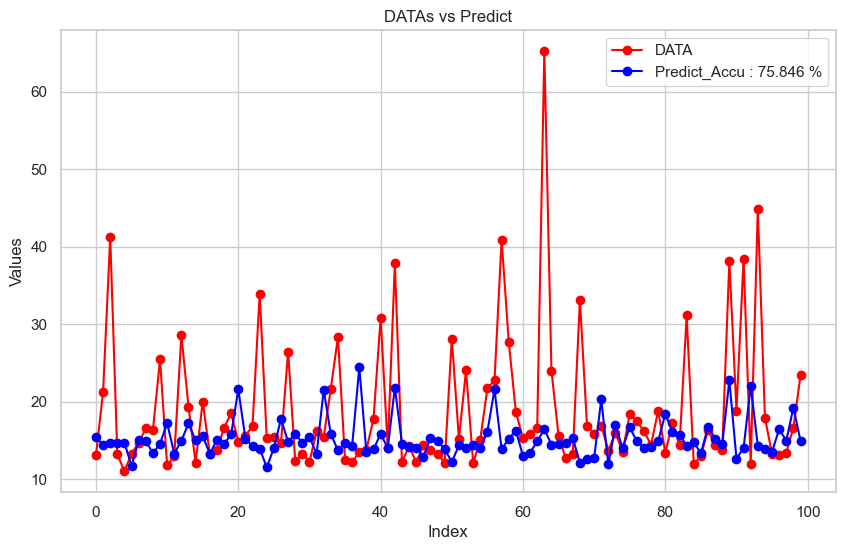

In [88]:
# Show the plot
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df_output['PT'], color='red', label='DATA',  marker = 'o')
plt.plot(df_predict['Predicted'], color='blue', label=f"Predict_Accu : {ACC_AVE:.3f} %",  marker = 'o')

# Adding title and labels
plt.title('DATAs vs Predict')
plt.xlabel('Index')
plt.ylabel('Values')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

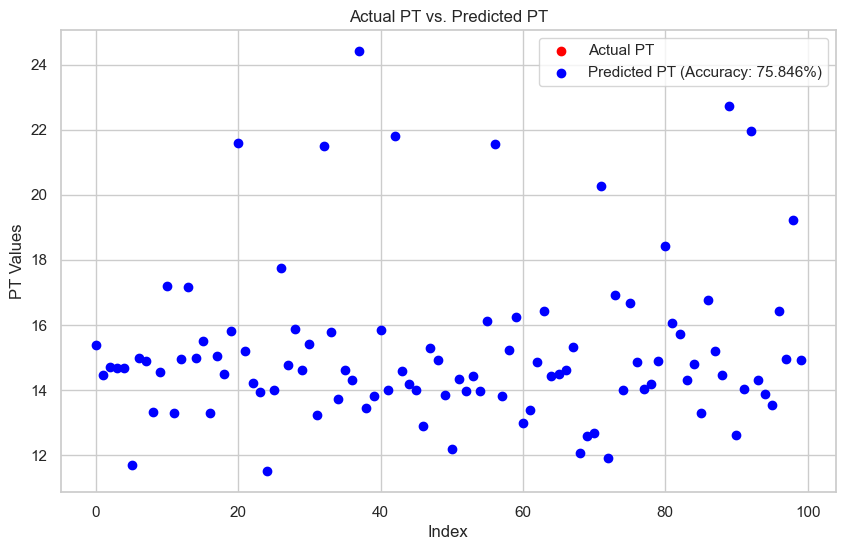

In [93]:
import matplotlib.pyplot as plt

# Assuming df_output and df_predict are defined and contain the actual and predicted PT values
# Assuming ACC_AVE is the accuracy value you want to display

plt.figure(figsize=(10, 6))

# Create a scatter plot for actual data
plt.scatter(df_output.index, df_output['PT'], color='red', label='Actual PT', marker='o')

# Create a scatter plot for predicted data
plt.scatter(df_predict.index, df_predict['Predicted'], color='blue', label=f"Predicted PT (Accuracy: {ACC_AVE:.3f}%)", marker='o')

# Adding title and labels
plt.title('Actual PT vs. Predicted PT')
plt.xlabel('Index')
plt.ylabel('PT Values')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


Epoch 1/100


C:\Users\simin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0203 - val_loss: 0.0107
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0107
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0106
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - val_loss: 0.0106
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0106
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0106
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0106
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - val_loss: 0.0107
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_lo

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0129
Epoch 70/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0128
Epoch 71/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0128
Epoch 72/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0127
Epoch 73/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0128
Epoch 74/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0129
Epoch 75/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0130
Epoch 76/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0129
Epoch 77/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0133
Epoch 78/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0127
Epoch 79/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0131
Epoch 80/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 

PermutationExplainer explainer: 142it [00:23,  3.51it/s]                                                                            
C:\Users\simin\AppData\Local\Temp\ipykernel_19224\1160057074.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


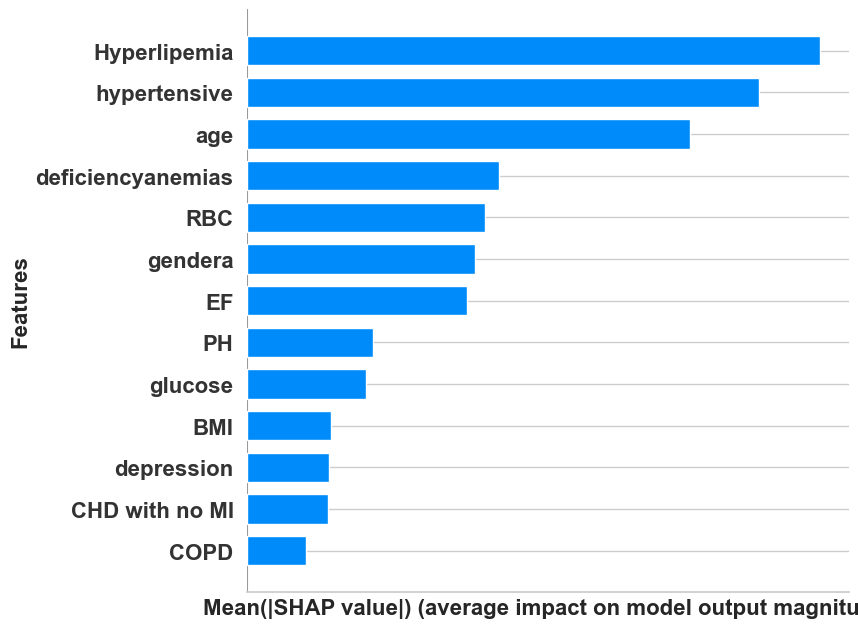

In [95]:
#SHAP Analysis, Feature Importance

import shap
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load dataset (assuming df is already loaded)
X = data[['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 
        'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']]
y = data['PT']

# Fix random state for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Neural Network Model
Input_Nodes = X_train.shape[1]
Output_Nodes = 1

model = Sequential()
model.add(Dense(2*Input_Nodes, activation='relu', input_shape=(Input_Nodes,)))  # First Hidden Layer
model.add(Dense(3*Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='softmax'))  # Softmax activation in the middle layer
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(round(Input_Nodes/2), activation='relu'))
model.add(Dense(Output_Nodes, use_bias=False))  # Output Layer

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Create SHAP Explainer
explainer = shap.Explainer(model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize SHAP Feature Importance (Bar Chart)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize axes labels and remove X-axis numbers
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=16, fontweight='bold')
plt.ylabel("Features", fontsize=16, fontweight='bold')

# Remove X-axis numbers
plt.xticks([])  # This removes the numbers on the X-axis
plt.yticks(fontsize=16, fontweight='bold')

plt.show()